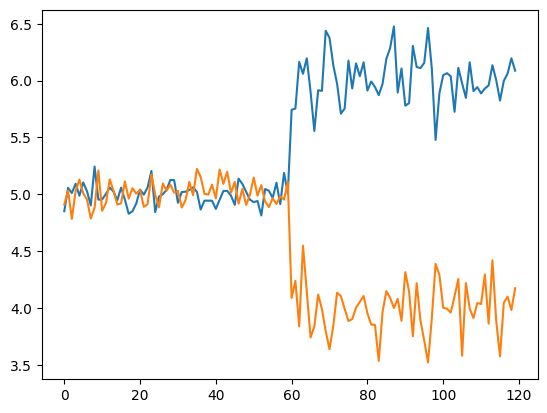

In [2]:
import numpy as np
import matplotlib.pyplot as plt

t = np.arange(0,100)
y1 = np.concatenate([np.random.normal(loc=5,scale=0.1, size=60),np.random.normal(loc=6,scale=0.2, size=60)])
y2 = np.concatenate([np.random.normal(loc=5,scale=0.1, size=60),np.random.normal(loc=4,scale=0.2, size=60)])

plt.plot(y1)
plt.plot(y2)

In [3]:
nu_plus = 1
nu_minus = 1
mu = 5
sigma = 0.1

LogLR_upper1 = (nu_plus/sigma)*((y1-mu-(nu_plus/2))/sigma)
LogLR_lower1 = (nu_minus/sigma)*((y1-mu+(nu_minus/2))/sigma)

UpperCumsum1 = [0]
LowerCumsum1 = [0]
for i in range(1, len(LogLR_upper1)):
    if UpperCumsum1[i-1] + LogLR_upper1[i] < 0:
        UpperCumsum1.append(0)
    else:
        UpperCumsum1.append(UpperCumsum1[i-1] + LogLR_upper1[i])
    
    if LowerCumsum1[i-1] - LogLR_lower1[i] < 0:
        LowerCumsum1.append(0)
    else:
        LowerCumsum1.append(LowerCumsum2[i-1] - LogLR_lower1[i])

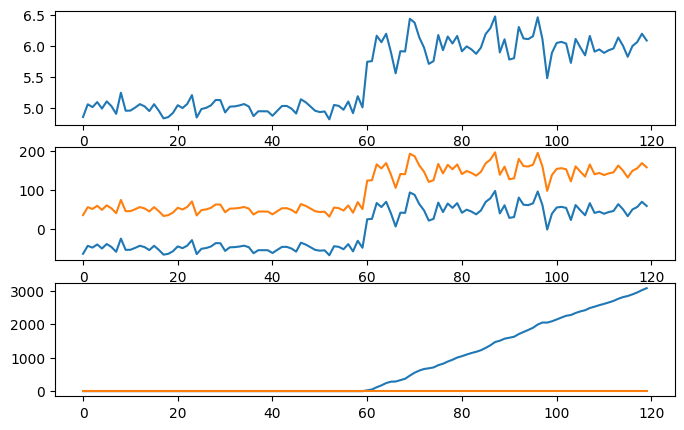

In [4]:
fig, ax = plt.subplots(3,1,figsize=(8,5))
ax[0].plot(y1)
ax[1].plot(LogLR_upper1)
ax[1].plot(LogLR_lower1)
ax[2].plot(UpperCumsum1)
ax[2].plot(LowerCumsum1)

In [5]:
LogLR_upper2 = (nu_plus/sigma)*((y2-mu-(nu_plus/2))/sigma)
LogLR_lower2 = (nu_minus/sigma)*((y2-mu+(nu_minus/2))/sigma)

UpperCumsum2 = [0]
LowerCumsum2 = [0]
for i in range(1, len(LogLR_upper2)):
    if UpperCumsum2[i-1] + LogLR_upper2[i] < 0:
        UpperCumsum2.append(0)
    else:
        UpperCumsum2.append(UpperCumsum2[i-1] + LogLR_upper2[i])
    
    if LowerCumsum2[i-1] - LogLR_lower2[i] < 0:
        LowerCumsum2.append(0)
    else:
        LowerCumsum2.append(LowerCumsum2[i-1] - LogLR_lower2[i])

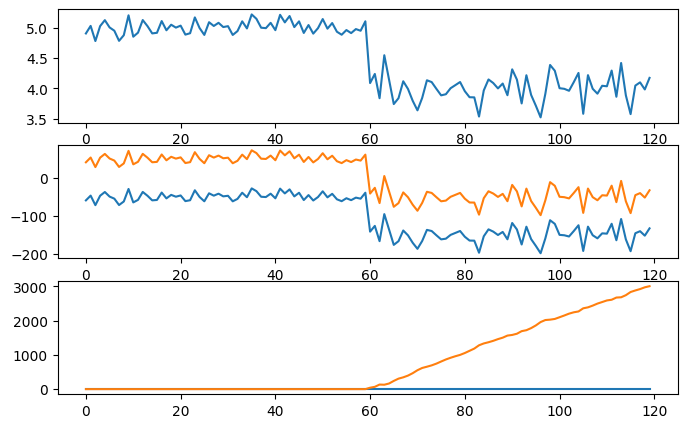

In [6]:
fig, ax = plt.subplots(3,1,figsize=(8,5))
ax[0].plot(y2)
ax[1].plot(LogLR_upper2)
ax[1].plot(LogLR_lower2)
ax[2].plot(UpperCumsum2)
ax[2].plot(LowerCumsum2)

In [7]:
from scipy.spatial.distance import cdist

M = 5
X = np.array([y1[i:i+M] for i in range(len(y1)-M+1)])
dist = cdist(X,X)
dist[dist==0]=100 # 近傍点に自分が入らないようにする

a = M*np.log(np.min(dist, axis=1))

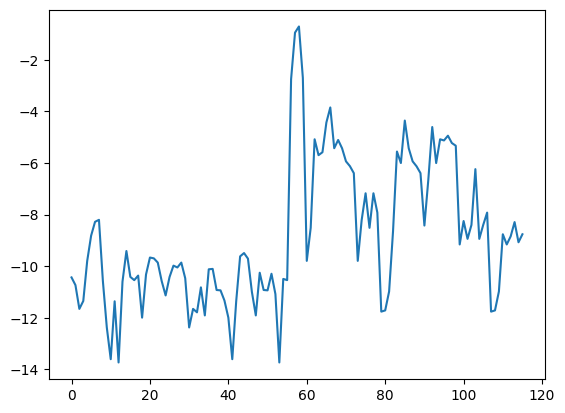

In [8]:
plt.plot(a)

In [42]:
def singular_spectrum_analysys(X, t, n, k, r, m, L):
    # 過去側のデータ行列(履歴行列)
    Xt = X[:,(t-n-M):(t-M)]
    # 現在のデータ行列(テスト行列)
    Zt = X[:,(t-k+L-M+1):(t-M+L+1)]

    # 特異値分解
    U = np.linalg.svd(Xt)[0][:,:r]
    Q = np.linalg.svd(Zt)[0][:,:m]

    # UQの最大固有値
    max_eig_value = np.linalg.svd(U.T@Q)[1][0]

    a = 1 - max_eig_value
    return a

M = 5# 窓幅
n = 4# 履歴行列の列数
r = 2# 履歴行列のパターン数
k = 3# テスト行列の列数
m = 3# テスト行列のパターン数
L = 4# ラグ

# 部分時系列の作成
X = np.array([y1[i:i+M] for i in range(len(y1)-M+1)]).T
T = len(X.T)
    
a = []
for t in range(M+n, T+M-L):
    a.append(singular_spectrum_analysys(X, t, n, k, r, m, L))

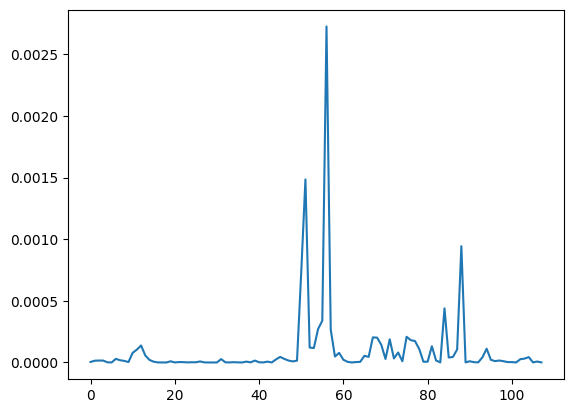

In [43]:
plt.plot(a)

In [269]:
def eig_value_lanczos(X, a, M, s, r):
    C = X@X.T
    #a=np.ones((M,1))/np.sqrt(M)

    aj = np.zeros((1+s,M,1))
    betaj = np.ones((1+s,1))

    _r = a

    for i in range(1,s+1):
        aj[i] = _r/betaj[i-1]
        alpha = aj[i].T@C@aj[i]
        _r = C@aj[i]-alpha*aj[i]-betaj[i-1]*aj[i-1]
        betaj[i] = np.sqrt(np.sum(_r**2))

    Ts = aj[1:,:,0]@C@aj[1:,:,0].T
    return np.sqrt(np.sum(np.linalg.eig(Ts)[1][0,:r]**2))

In [278]:
def singular_spectrum_analysys(X, t, n, k, r, m, L):
    # 過去側のデータ行列(履歴行列)
    Xt = X[:,(t-n-M):(t-M)]
    # 現在のデータ行列(テスト行列)
    Zt = X[:,(t-k+L-M+1):(t-M+L+1)]

    # 特異値分解
    #U = np.linalg.svd(Xt)[0][:,:r]
    Q = np.linalg.svd(Zt)[0][:,:m]
    
    
    a=1-eig_value_lanczos(Xt, Q[:,0:1], M, 3, r)
    return a

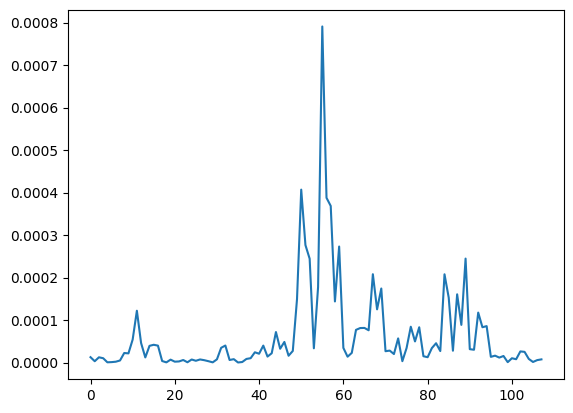

In [279]:
M = 5# 窓幅
n = 4# 履歴行列の列数
r = 2# 履歴行列のパターン数
k = 3# テスト行列の列数
m = 3# テスト行列のパターン数
L = 4# ラグ

# 部分時系列の作成
X = np.array([y1[i:i+M] for i in range(len(y1)-M+1)]).T
T = len(X.T)
    
a = []
for t in range(M+n, T+M-L):
    a.append(singular_spectrum_analysys(X, t, n, k, r, m, L))
plt.plot(a)